The aim here is to predict rating for apps. In the first part, we are trying to train our model to predict rating for the apps which are paid apps and calculate the error rate for our trained model.
In the second part, we are trying to predict rating for the apps with our trained model for apps which are free initially and then are made paid. So, we are checking whether it's popularity remains the same.

Input dataset : https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore.csv

# Training model with the paid apps data

In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading file for ios apps from AppleStore dataset

Path = r'C:\Users\Dhwani\Desktop\AppoMania\googleplaystore.csv'
googleStoreDf = pd.read_csv(Path,parse_dates=True)
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
googleStoreDf.count()

App               10840
Category          10840
Rating             9366
Reviews           10840
Size              10840
Installs          10840
Type              10839
Price             10840
Content Rating    10840
Genres            10840
Last Updated      10840
Current Ver       10832
Android Ver       10838
dtype: int64

In [4]:
# Taking features which are required for rating prediction into a temporary dataset

lmDf = googleStoreDf[['Rating','Reviews','Category','Installs','Price','Content Rating']]

In [5]:
lmDf.count()

Rating             9366
Reviews           10840
Category          10840
Installs          10840
Price             10840
Content Rating    10840
dtype: int64

In [6]:
lmDf.isna().sum()

Rating            1474
Reviews              0
Category             0
Installs             0
Price                0
Content Rating       0
dtype: int64

In [7]:
lmDf.dropna(inplace=True)
lmDf[lmDf.isnull().any(axis=1)]

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rating,Reviews,Category,Installs,Price,Content Rating


In [8]:
lmDf.count()

Rating            9366
Reviews           9366
Category          9366
Installs          9366
Price             9366
Content Rating    9366
dtype: int64

In [9]:
lmDf.dtypes

Rating            float64
Reviews             int64
Category           object
Installs           object
Price              object
Content Rating     object
dtype: object

In [10]:
lmDf.head()

,Rating,Reviews,Category,Installs,Price,Content Rating
0,4.1,159,ART_AND_DESIGN,"10,000+",0,Everyone
1,3.9,967,ART_AND_DESIGN,"500,000+",0,Everyone
2,4.7,87510,ART_AND_DESIGN,"5,000,000+",0,Everyone
3,4.5,215644,ART_AND_DESIGN,"50,000,000+",0,Teen
4,4.3,967,ART_AND_DESIGN,"100,000+",0,Everyone


# Exploratory data analysis for google data store apps rating

In [57]:
print(len(googleStoreDf['App'].unique()))
print(len(googleStoreDf['Category'].unique()))

9659
33


In [58]:
# reducing the number of categories

s = googleStoreDf.Category.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

googleStoreDf['broad_genre']= googleStoreDf.Category.apply(lambda x : categ(x))

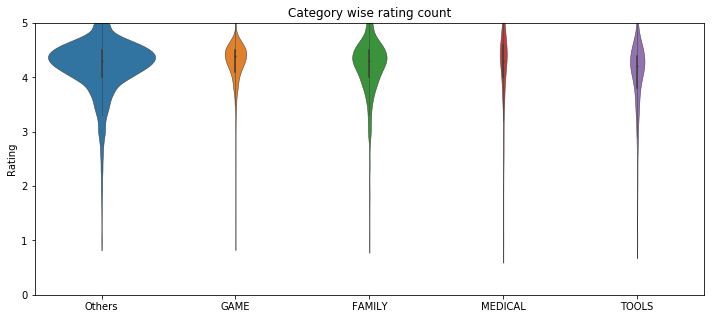

In [60]:
# Rating distribution per category

import seaborn as sns

plt.figure(figsize=(12,5))
plt.style.use('fast')
plt.ylim([0,5])

plt.title('Category wise rating count')

sns.violinplot(data=googleStoreDf, y ='Rating',x='broad_genre',
               vertical=True,kde=False ,linewidth=0.5,
               scale ='count',width = 0.8)

plt.xlabel(" ")
plt.ylabel("Rating")
plt.show()

In [62]:
googleStoreDf['Price'] = googleStoreDf['Price'].astype('object').str.replace('$', '')
googleStoreDf['Price'] = pd.to_numeric(googleStoreDf['Price'])


def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

googleStoreDf['paidorfree']= googleStoreDf.Price.apply(lambda x : paid(x))
googleStoreDf.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,broad_genre,paidorfree
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up,FAMILY,Free
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up,FAMILY,Free
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up,MEDICAL,Free
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,Others,Free
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0.0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device,Others,Free


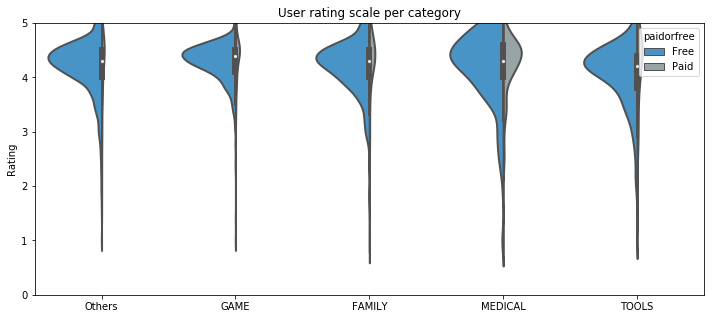

In [63]:
plt.figure(figsize=(12,5))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("User rating scale per category")
sns.violinplot(data=googleStoreDf, y ='Rating',x='broad_genre',hue='paidorfree',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#3498db','#95a5a6'])
plt.xlabel(" ")
plt.ylabel("Rating")

plt.show()

In [11]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

lmDf['Installs'] = lmDf['Installs'].astype('object').str.replace('+', '')
lmDf['Installs'] = lmDf['Installs'].astype('object').str.replace(',', '')
lmDf['Price'] = lmDf['Price'].astype('object').str.replace('$', '')
lmDf['Installs'] = pd.to_numeric(lmDf['Installs'])
lmDf['Price'] = pd.to_numeric(lmDf['Price'])
lmDf = lmDf[(lmDf.Price != 0) & (lmDf.Rating != 0)]

obj = LabelEncoder()
lmDf['Category'] = obj.fit_transform(lmDf['Category'].astype('object'))
lmDf['Content Rating'] = obj.fit_transform(lmDf['Content Rating'].astype('object'))
#lmDf.head()

lmDf.dtypes

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

Rating            float64
Reviews             int64
Category            int64
Installs            int64
Price             float64
Content Rating      int64
dtype: object

In [12]:
lmDf.describe()

,Rating,Reviews,Category,Installs,Price,Content Rating
count,647.000000,6.470000e+02,647.000000,6.470000e+02,647.000000,647.000000
mean,4.266615,1.443277e+04,13.624420,1.127397e+05,13.910433,0.312210
std,0.547523,1.344915e+05,6.379841,7.035939e+05,58.704314,0.828043
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.990000,0.000000
25%,4.100000,3.300000e+01,8.000000,1.000000e+03,1.990000,0.000000
50%,4.400000,2.140000e+02,13.000000,5.000000e+03,2.990000,0.000000
75%,4.600000,2.253000e+03,18.000000,5.000000e+04,4.990000,0.000000
max,5.000000,2.376564e+06,27.000000,1.000000e+07,400.000000,3.000000


In [13]:
y = lmDf[['Rating']].copy()
X = lmDf.drop('Rating',axis=1)

In [14]:
X.count()

Reviews           647
Category          647
Installs          647
Price             647
Content Rating    647
dtype: int64

In [15]:
y.count()

Rating    647
dtype: int64

In [16]:
#Spliting dataset into train and test data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
Predict_rating_train = lm.predict(X_train)
Predict_rating_test = lm.predict(X_test)

In [18]:
# Calculating error rate

ratingErrorTest = round(np.mean(np.subtract(Y_test.values,Predict_rating_test) ** 2),3)
print(ratingErrorTest)

0.279


In [19]:
ratingErrorTrain = round(np.mean(np.subtract(Y_train.values,Predict_rating_train) ** 2),3)
print(ratingErrorTrain)

0.296


In [20]:
# prediction score

print(lm.score(X_test,Y_test))

0.02242737537132744


In [21]:
print(lm.score(X_train,Y_train))

0.025862421641856925


In [22]:
X_train.count()

Reviews           485
Category          485
Installs          485
Price             485
Content Rating    485
dtype: int64

In [23]:
Y_train.count()

Rating    485
dtype: int64

In [24]:
Y_test.count()

Rating    162
dtype: int64

In [25]:
X_test.count()

Reviews           162
Category          162
Installs          162
Price             162
Content Rating    162
dtype: int64

In [64]:
# Applying Random forest regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import cross_val_score, cross_validate

max_depth = 20
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, Y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, Y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [65]:
# Calculating error rate

ratingErrorTest = round(np.mean(np.subtract(Y_test.values,regr_rf.predict(X_test)) ** 2),3)
print(ratingErrorTest)

0.381


In [66]:
# prediction score

print(regr_rf.score(X_test,Y_test))

0.12282141600702891


# Let's test our trained model with the ratings of apps which are free for now

In [26]:
#Reading file for predicted price of apple apps

Path = r'C:\Users\Dhwani\Desktop\AppoMania\price_prediction_google.csv'
predictedPrice = pd.read_csv(Path,parse_dates=True)
predictedPrice.head()

,predicted_price
0,29
1,26
2,18
3,13
4,25


In [27]:
predictedPrice.count()

predicted_price    8718
dtype: int64

In [28]:
predictedPrice.isna().sum()

predicted_price    0
dtype: int64

In [29]:
XFreeAppsFeatures = googleStoreDf[['Rating','Reviews','Category','Installs','Content Rating','Price']].copy()

In [30]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

XFreeAppsFeatures = googleStoreDf[['Rating','Reviews','Category','Installs','Content Rating','Price']].copy()
XFreeAppsFeatures.dropna(inplace=True)
XFreeAppsFeatures[XFreeAppsFeatures.isnull().any(axis=1)]
XFreeAppsFeatures['Installs'] = XFreeAppsFeatures['Installs'].astype('object').str.replace('+', '')
XFreeAppsFeatures['Installs'] = XFreeAppsFeatures['Installs'].astype('object').str.replace(',', '')
XFreeAppsFeatures['Price'] = XFreeAppsFeatures['Price'].astype('object').str.replace('$', '')
XFreeAppsFeatures['Installs'] = pd.to_numeric(XFreeAppsFeatures['Installs'])
XFreeAppsFeatures['Price'] = pd.to_numeric(XFreeAppsFeatures['Price'])
XFreeAppsFeatures = XFreeAppsFeatures[(XFreeAppsFeatures.Price == 0) & (XFreeAppsFeatures.Rating != 0)]

obj = LabelEncoder()
XFreeAppsFeatures['Category'] = obj.fit_transform(XFreeAppsFeatures['Category'].astype('object'))

XFreeAppsFeatures = XFreeAppsFeatures[XFreeAppsFeatures["Content Rating"] != "Unrated"]
XFreeAppsFeatures.loc[XFreeAppsFeatures["Content Rating"] == "Unrated"]
XFreeAppsFeatures['Content Rating'] = obj.fit_transform(XFreeAppsFeatures['Content Rating'].astype('object'))
#lmDf.head()

XFreeAppsFeatures.dtypes

Rating            float64
Reviews             int64
Category            int64
Installs            int64
Content Rating      int64
Price             float64
dtype: object

In [31]:
XFreeAppsFeatures.head()

,Rating,Reviews,Category,Installs,Content Rating,Price
0,4.1,159,0,10000,1,0.0
1,3.9,967,0,500000,1,0.0
2,4.7,87510,0,5000000,1,0.0
3,4.5,215644,0,50000000,4,0.0
4,4.3,967,0,100000,1,0.0


In [32]:
#XFreeAppsFeatures.isna().sum()
XFreeAppsFeatures[XFreeAppsFeatures.isnull().any(axis=1)]

,Rating,Reviews,Category,Installs,Content Rating,Price


In [33]:
#predictedPrice.isna().sum()
predictedPrice[predictedPrice.isnull().any(axis=1)]

,predicted_price


In [34]:
predictedPrice.count()

predicted_price    8718
dtype: int64

In [35]:
XFreeAppsFeatures.count()

Rating            8718
Reviews           8718
Category          8718
Installs          8718
Content Rating    8718
Price             8718
dtype: int64

In [36]:
XFreeAppsFeatures.reset_index(inplace = True)
XFreeAppsFeatures["predicted_price"] = predictedPrice.predicted_price
#XFreeAppsFeatures = XFreeAppsFeatures.join(predictedPrice)
XFreeAppsFeatures.count()

index              8718
Rating             8718
Reviews            8718
Category           8718
Installs           8718
Content Rating     8718
Price              8718
predicted_price    8718
dtype: int64

In [37]:
XFreeAppsFeatures.isna().sum()

index              0
Rating             0
Reviews            0
Category           0
Installs           0
Content Rating     0
Price              0
predicted_price    0
dtype: int64

In [38]:
XFreeAppsFeaturesTrain = XFreeAppsFeatures.drop(columns = ['Rating','Price','index'])

In [39]:
XFreeAppsFeatures = XFreeAppsFeatures.drop(columns = ['Price'])

In [40]:
XFreeAppsFeatures.count()

index              8718
Rating             8718
Reviews            8718
Category           8718
Installs           8718
Content Rating     8718
predicted_price    8718
dtype: int64

In [41]:
# Taking data where Price > 0 and rating > 0
from sklearn.preprocessing import LabelEncoder

XPaidAppsFeatures = googleStoreDf[['Rating','Reviews','Category','Installs','Content Rating','Price']].copy()
XPaidAppsFeatures.dropna(inplace=True)
XPaidAppsFeatures[XPaidAppsFeatures.isnull().any(axis=1)]
XPaidAppsFeatures['Installs'] = XPaidAppsFeatures['Installs'].astype('object').str.replace('+', '')
XPaidAppsFeatures['Installs'] = XPaidAppsFeatures['Installs'].astype('object').str.replace(',', '')
XPaidAppsFeatures['Price'] = XPaidAppsFeatures['Price'].astype('object').str.replace('$', '')
XPaidAppsFeatures['Installs'] = pd.to_numeric(XPaidAppsFeatures['Installs'])
XPaidAppsFeatures['Price'] = pd.to_numeric(XPaidAppsFeatures['Price'])
XPaidAppsFeatures = XPaidAppsFeatures[(XPaidAppsFeatures.Price != 0) & (XPaidAppsFeatures.Rating != 0)]

obj = LabelEncoder()
XPaidAppsFeatures['Category'] = obj.fit_transform(XPaidAppsFeatures['Category'].astype('object'))

XPaidAppsFeatures = XPaidAppsFeatures[XPaidAppsFeatures["Content Rating"] != "Unrated"]
XPaidAppsFeatures['Content Rating'] = obj.fit_transform(XPaidAppsFeatures['Content Rating'].astype('object'))
#lmDf.head()

XPaidAppsFeatures.dtypes
XPaidAppsFeaturesTrain = XPaidAppsFeatures.drop(columns = ['Rating'])

In [42]:
XPaidAppsFeaturesTrain.count()

Reviews           647
Category          647
Installs          647
Content Rating    647
Price             647
dtype: int64

In [43]:
XPaidAppsFeatures.count()

Rating            647
Reviews           647
Category          647
Installs          647
Content Rating    647
Price             647
dtype: int64

In [44]:
XFreeAppsFeaturesTrain.count()

Reviews            8718
Category           8718
Installs           8718
Content Rating     8718
predicted_price    8718
dtype: int64

In [45]:
XFreeAppsFeatures.count()

index              8718
Rating             8718
Reviews            8718
Category           8718
Installs           8718
Content Rating     8718
predicted_price    8718
dtype: int64

In [46]:
XFreeAppsFeatures.isna().sum()

index              0
Rating             0
Reviews            0
Category           0
Installs           0
Content Rating     0
predicted_price    0
dtype: int64

In [47]:
# Training linear regression model with feature of paid apps

lm.fit(XPaidAppsFeaturesTrain,XPaidAppsFeatures.Rating)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print(lm.predict(XFreeAppsFeaturesTrain))

[4.30644506 4.33408149 4.56047812 ... 4.31192353 4.43360073 4.77035972]


Text(0.5,0,'actual rating')

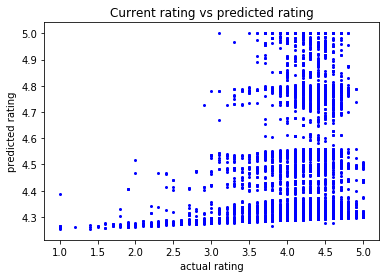

In [49]:
plt.scatter(XFreeAppsFeatures.Rating,
            np.clip(lm.predict(XFreeAppsFeaturesTrain), XFreeAppsFeatures['Rating'].min(), XFreeAppsFeatures['Rating'].max()),
                    c='b',s=4,alpha=1)

plt.title('Current rating vs predicted rating')
plt.ylabel('predicted rating')
plt.xlabel('actual rating')

Text(0.5,0,'actual rating')

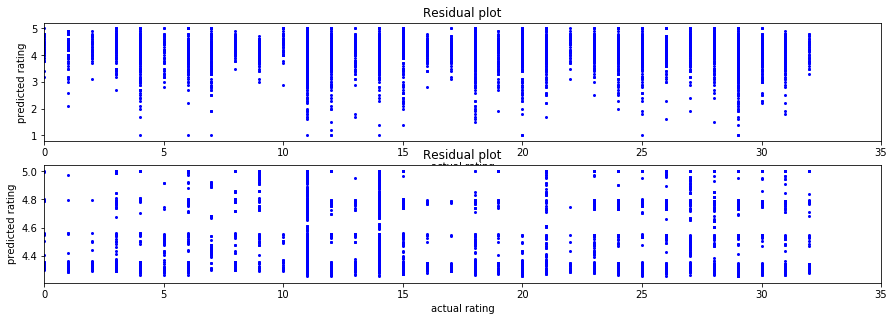

In [50]:
yrange = [0,35]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
plt.scatter(XFreeAppsFeatures.Category,XFreeAppsFeatures.Rating,c='b',s=4,alpha=1)

plt.title('Current and predicted rating')
plt.ylabel('current rating')

plt.subplot(4,1,2)
plt.xlim(yrange)
plt.scatter(XFreeAppsFeatures.Category,np.clip(lm.predict(XFreeAppsFeaturesTrain), XFreeAppsFeatures['Rating'].min(), XFreeAppsFeatures['Rating'].max()),c='b',s=4,alpha=1)

plt.ylabel('predicted rating')
plt.xlabel('Category')

In [51]:
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [52]:
lmDf.head()

,Rating,Reviews,Category,Installs,Price,Content Rating
234,4.7,11442,3,100000,4.99,0
235,4.8,10295,3,100000,4.99,0
290,4.7,11442,3,100000,4.99,0
291,4.8,10295,3,100000,4.99,0
427,4.0,18247,4,100000,3.99,0


In [53]:
feature = lmDf.iloc[:,1:].columns.tolist()
target = lmDf.iloc[:,0].name

In [54]:
from scipy.stats import pearsonr

correlations = {}
for f in feature:
    data_temp = lmDf[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [55]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
Price vs Rating,-0.112951
Content Rating vs Rating,0.103605
Installs vs Rating,0.059029
Reviews vs Rating,0.043467
Category vs Rating,-0.027570


In [68]:
# # Training model with paid apps rating using Random forest regressor

regr_rf.fit(XPaidAppsFeaturesTrain,XPaidAppsFeatures.Rating)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

Text(0,0.5,'predicted rating')

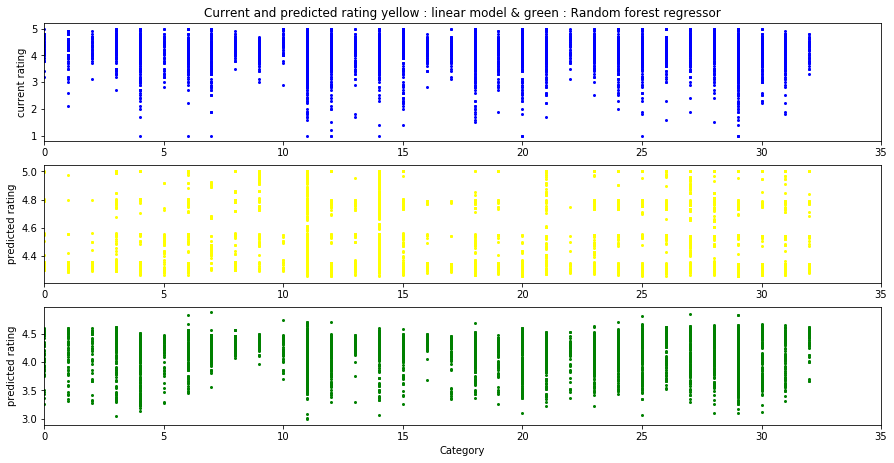

In [72]:
yrange = [0,35]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
plt.scatter(XFreeAppsFeatures.Category,XFreeAppsFeatures.Rating,c='b',s=4,alpha=1)

plt.title('Current and predicted rating yellow : linear model & green : Random forest regressor')
plt.ylabel('current rating')

plt.subplot(4,1,2)
plt.xlim(yrange)
plt.scatter(XFreeAppsFeatures.Category,np.clip(lm.predict(XFreeAppsFeaturesTrain), XFreeAppsFeatures['Rating'].min(), XFreeAppsFeatures['Rating'].max()),c='yellow',s=4,alpha=1)

plt.ylabel('predicted rating')

plt.subplot(4,1,3)
plt.xlim(yrange)
plt.scatter(XFreeAppsFeatures.Category,np.clip(regr_rf.predict(XFreeAppsFeaturesTrain), XFreeAppsFeatures['Rating'].min(), XFreeAppsFeatures['Rating'].max()),c='green',s=4,alpha=1)

plt.xlabel('Category')
plt.ylabel('predicted rating')